<a href="https://colab.research.google.com/github/Niharika-Ravela/Niharika_INFO5502_Summer2022/blob/main/INFO_5502_Final_Exam_Summer_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):


In [1]:
#### You code here
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/births.csv')
df.head()



,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  app.launch_new_instance()


              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625
...              ...
2012-12-27  4850.150
2012-12-28  5044.200
2012-12-29  5120.150
2012-12-30  5172.350
2012-12-31  4859.200

[366 rows x 1 columns]


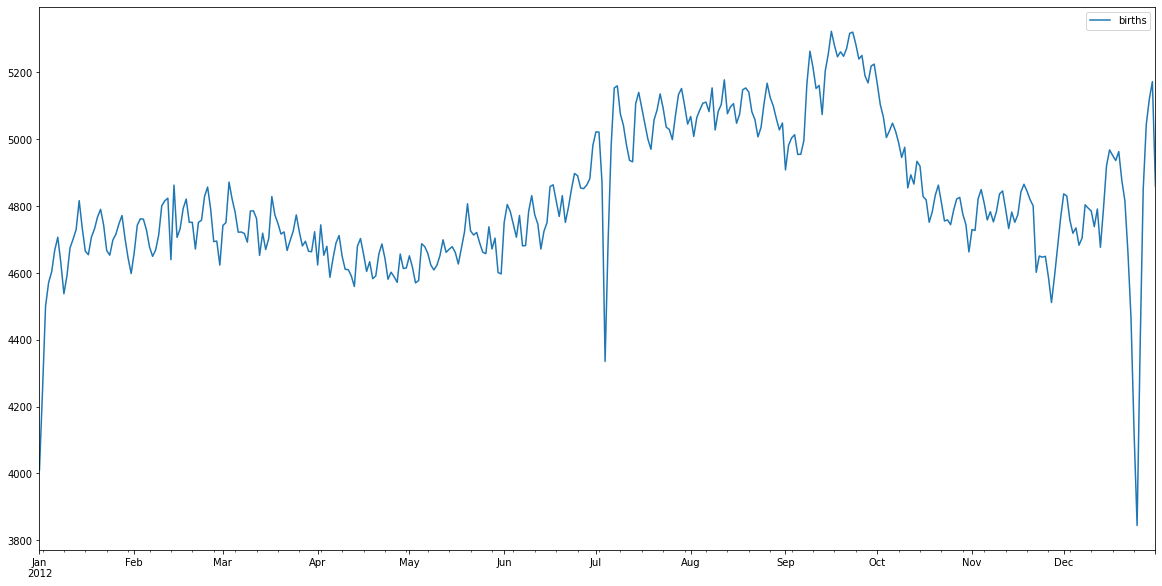

In [2]:
from IPython.core.pylabtools import figsize
import seaborn as sns

quartile = np.percentile(df['births'], [25, 50, 75])
mu, sig = quartile[1], 0.74 * (quartile[2] - quartile[0])
births = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

#births_by_date['Date'] = births_by_date.index

#births_by_date['Date'] = pd.to_datetime(births_by_date['Date'], format='%Y/%m/%d')

print(births_by_date)
'''sns.set(rc={'axes.facecolor':'#c0cefa'}) # graph facecolor
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
ann_color = '#c449cc' # annotation color

fig, ax = plt.subplots(facecolor='#f0eeee')
fig.set_size_inches(10, 5)
ax.plot('Date', 'births', data=births_by_date, color='#5d35f2', linewidth=3)
plt.tight_layout()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)

ttl = ax.set_title('Frequencies of Birthday', fontsize=18, pad=18, color=font_color, **csfont)
ttl.set_position([.5, 1.02])

arrowprops=dict(arrowstyle='-|>', color=ann_color, linewidth=2)

# Annotation for df['date'][66]
ax.annotate('November 2016', 
            xy=(births_by_date['Date'][60], 75), # arrow position (x, y)
            xytext=(births_by_date['Date'][10], 60), # text position (x, y)
            color=ann_color,
            arrowprops=arrowprops,
            fontsize=16,
            **hfont)
# Annotation for df['date'][78]
ax.annotate('January 2017', 
            xy=(births_by_date['Date'][80], 98), # arrow position (x, y)
            xytext=(births_by_date['Date'][80], 85), # text position (x, y)
            color=ann_color,
            arrowprops=arrowprops,
            fontsize=16,
            **hfont)
# Annotation for df['date'][150]
ax.annotate('June 2018', 
            xy=(df['date'][155], 65), # arrow position (x, y)
            xytext=(df['date'][155], 50), # text position (x, y)
            color=ann_color,
            arrowprops=arrowprops,
            fontsize=16,
            **hfont)
## Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)
plt.show()
ax.set_ylabel('Trend', color=font_color, fontsize=16, **hfont)
plt.xticks(color=font_color, **hfont)
plt.yticks(color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

filename = 'mpl-line-chart'
plt.savefig(filename+'.png', facecolor=('#f0eeee'))
plt.show()
'''
fig, ax = plt.subplots(figsize=(20, 10))
births_by_date.plot(ax=ax)

plt.show()

<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 


In [3]:
#### You code here

import numpy as np

confusion_matrix = [[157,46,25,22,15,3],
                    [28,151,45,18,1,6],
                    [11,38,135,14,3,7],
                    [11,15,18,70,6,4],
                    [14,12,14,7,56,2],
                    [12,7,6,5,5,16]]
confusion_array = np.array(confusion_matrix)

for i in range(len(confusion_array)):
  accuracy = recall = precision = f1_score = 0
  true_pos = confusion_array[i,i]
  false_pos = confusion_array[i,:].sum() - true_pos
  false_neg = confusion_array[:,i].sum() - true_pos
  true_neg = confusion_array.sum().sum() - (true_pos+false_pos+false_neg)
    
  accuracy = (true_pos + true_neg) / confusion_array.sum().sum()
  recall = true_pos / (true_pos + false_neg)
  precision = true_pos / (true_pos + false_pos)
  f1_score = 2 * precision * recall / (precision + recall)
    
  print('*************************************************')
  print('For Class ',(i+1))
  print('Accuracy : ',accuracy)
  print('Recall : ',recall)
  print('Precision: ',precision)
  print('F1 Score: ',f1_score)
  print()




*************************************************
For Class  1
Accuracy :  0.8139303482587065
Recall :  0.6738197424892703
Precision:  0.585820895522388
F1 Score:  0.626746506986028

*************************************************
For Class  2
Accuracy :  0.7850746268656716
Recall :  0.5613382899628253
Precision:  0.606425702811245
F1 Score:  0.583011583011583

*************************************************
For Class  3
Accuracy :  0.8199004975124378
Recall :  0.5555555555555556
Precision:  0.6490384615384616
F1 Score:  0.598669623059867

*************************************************
For Class  4
Accuracy :  0.8805970149253731
Recall :  0.5147058823529411
Precision:  0.5645161290322581
F1 Score:  0.5384615384615384

*************************************************
For Class  5
Accuracy :  0.9213930348258706
Recall :  0.6511627906976745
Precision:  0.5333333333333333
F1 Score:  0.5863874345549738

*************************************************
For Class  6
Accuracy :  0.943

<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [4]:
#### You code here


# 1. Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. 
#Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string.
intrusion_data = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int', sep = " ", header = None)
normal_data = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int', sep = " ", header = None)

intrusion_data.columns = ['PID','system_call']
intrusion_data.head()

,PID,system_call
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5


In [5]:
normal_data.columns = ['PID','system_call']
normal_data.head()

,PID,system_call
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5


In [6]:
intrusion_dict = {}
normal_dict = {}

for i in list(set(intrusion_data['PID'].values)):
    intrusion_dict[i] = " ".join(str(j) for j in list(intrusion_data[intrusion_data['PID'] == i]['system_call'].values))

for i in list(set(normal_data['PID'].values)):
    normal_dict[i] = " ".join(str(j) for j in list(normal_data[normal_data['PID'] == i]['system_call'].values))

In [7]:
# 2. Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).
import re
from nltk.util import ngrams
intrusion_list = []
normal_list = []

for key in intrusion_dict.keys():
    s = intrusion_dict[key]
    tokens = [i for i in s.split(" ") if i != ""]
    
    for i in list(ngrams(tokens, 25)):
        intrusion_list.append(i)
        
for j in normal_dict.keys():
    s = normal_dict[j]
    tokens = [i for i in s.split(" ") if i != ""]
    
    for i in list(ngrams(tokens, 25)):
        normal_list.append(i) 

print(len(intrusion_list))
print(len(normal_list))

7627
469


In [8]:
# 3. Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

intrusion_df = pd.DataFrame(intrusion_list)
normal_df = pd.DataFrame(normal_list)

intrusion_df['class'] = 1
normal_df['class'] = 0

df = pd.DataFrame()

df = df.append(intrusion_df)
df = df.append(normal_df)

In [9]:
# 4.As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. 
#Condense training data and testing data into two sets. 
#Take the difference between the testing set and training set to remove the overlapped sequences from the testing data.
df = df.drop_duplicates(subset = df.columns[:-1], keep = 'last')
df['class'].value_counts()

df.columns[:-1]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24],
      dtype='object')

In [10]:
# 5. The sequences from each class can be repetitive, and some of these sequences may have different labels. 
#Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. 
#Start out by separating the Normal class and Intrusion class in both training and testing data. 
#Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.
X = df.drop("class", axis = 1)
y = df['class']


In [11]:
# 6. Bootstrap the training data to get the same number of sequences from each class. 
#Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)

classifier = DecisionTreeClassifier(max_depth = 10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.93      0.91      0.92        57

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [12]:
#### You code and your answer here here

#https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/Software_Reviews_csv_files_S.csv

import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/Software_Reviews_csv_files_S.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,...,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score,Unnamed: 27
0,0.0,0,13879,Published,GetApp___14383,f7535d1342,90666,The best CRM solution we've found,FALSE,4.462893,...,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982,1.850533e+04
1,1.0,1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,...,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743,1.711777e+06
2,2.0,2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,...,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145,1.122507e+06
3,3.0,3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,...,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214,1.413648e+06
4,4.0,4,13939,Published,GetApp___14453,efc7312240,90666,Excellent business management app for the SMB ...,FALSE,4.462893,...,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434,1.858400e+04


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2988 non-null   float64
 1   Unnamed: 0.1             2999 non-null   object 
 2   id                       2999 non-null   object 
 3   status                   2999 non-null   object 
 4   global_review_id         2999 non-null   object 
 5   hash_global_review_id    2999 non-null   object 
 6   listing_id               2999 non-null   object 
 7   title                    2871 non-null   object 
 8   is_rating                2999 non-null   object 
 9   score                    2999 non-null   object 
 10  created                  2999 non-null   object 
 11  OverAllRating            2999 non-null   object 
 12  Value For Money          2999 non-null   object 
 13  Ease of Use              2999 non-null   object 
 14  Features                

In [14]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'status', 'global_review_id',
       'hash_global_review_id', 'listing_id', 'title', 'is_rating', 'score',
       'created', 'OverAllRating', 'Value For Money', 'Ease of Use',
       'Features', 'Customer Support', 'Likelihood to recommned',
       'isAnonymous', 'is_verified', 'full_name', 'company_industry',
       'frequency_of_use', 'time_used', 'source', 'incentivized',
       'ReviewDescription_score', 'Pros_score', 'Unnamed: 27'],
      dtype='object')

In [15]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 27'], axis=1)

,id,status,global_review_id,hash_global_review_id,listing_id,title,is_rating,score,created,OverAllRating,...,isAnonymous,is_verified,full_name,company_industry,frequency_of_use,time_used,source,incentivized,ReviewDescription_score,Pros_score
0,13879,Published,GetApp___14383,f7535d1342,90666,The best CRM solution we've found,FALSE,4.462893,8/25/2015,5,...,FALSE,TRUE,Marcus B.,Information Technology and Services,NaN,1-2 years,GetApp,NaN,0.993886769,0.994333982
1,1283833,Published,SoftwareAdvice___434035,8b72a5b935,90666,Reasonable CRM software for small businesses,FALSE,4.462893,6/22/2018,4,...,FALSE,FALSE,Rushang D.,Marketing and Advertising,daily,2+ years,SoftwareAdvice,NominalGift,0.998566568,0.99880743
2,841881,Published,Capterra___330384,0d580775b7,90666,"Security certificate warning, basic lists inac...",FALSE,4.462893,12/20/2017,1,...,FALSE,FALSE,Julian G.,Computer Hardware,daily,6-12 months,Capterra,NominalGift,0.999743998,0.996420145
3,1060237,Published,SoftwareAdvice___390950,a36d0ef509,90666,1CRM is a great started CRM for a Service Company,FALSE,4.462893,4/4/2018,4,...,FALSE,FALSE,James C.,Management Consulting,daily,1-2 years,SoftwareAdvice,NominalGift,0.938319802,0.986604214
4,13939,Published,GetApp___14453,efc7312240,90666,Excellent business management app for the SMB ...,FALSE,4.462893,8/26/2015,5,...,FALSE,TRUE,Jacques G.,Telecommunications,NaN,1-2 years,GetApp,NaN,0.985312879,0.996334434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2817595,Published,Capterra___1461921,5f48e3fe4e,106031,Best Tool Ever,FALSE,4.462893,4/7/2019,5,...,FALSE,FALSE,Mary Beth H.,Marketing and Advertising,daily,6-12 months,Capterra,NominalGift,0.997865975,0.987068415
2995,1236359,Published,Capterra___491231,d3ae4cbffd,106031,It's Excel for modern days,FALSE,4.462893,6/5/2018,5,...,FALSE,FALSE,Rico C.,Real Estate,daily,1-2 years,Capterra,NominalGift,0.999700904,0.988342941
2996,4841103,Published,Capterra___1953079,29e5b5034e,106031,"Strong learning curve, but ultimately worthwhile",FALSE,4.462893,1/14/2020,5,...,FALSE,FALSE,Susanne S.,Education Management,daily,6-12 months,Capterra,NominalGift,0.999757349,0.989686906
2997,4442199,Published,Capterra___1854915,9a9b1c6351,106031,Must have for data enthusiasts,FALSE,4.462893,11/21/2019,5,...,FALSE,FALSE,Epiphany P.,Higher Education,daily,6-12 months,Capterra,NominalGift,0.994760931,0.999741495


In [16]:
group_a = df[(df['incentivized'] == "NominalGift") | (df['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']
group_b = df[(df['incentivized'] == "NoIncentive") | (df['incentivized'] == "NonNominalGift") | (df['incentivized'] == "VendorReferred")]['OverAllRating']

In [20]:
no_of_control_grp = group_a.shape[0]
no_of_treatment_grp = group_b.shape[0]

alpha = 0.05

mean_control_grp = np.mean(group_a)
mean_treatment_grp = np.mean(group_b)

group_a = group_a.astype('float')
group_b = group_b.astype('float')

var_control_grp = np.var(group_a)
var_treatment_grp = np.var(group_b)

comb_var = np.sqrt(var_control_grp / no_of_control_grp + var_treatment_grp / no_of_treatment_grp)

t_test = (mean_control_grp - mean_treatment_grp) / np.sqrt(var_control_grp / no_of_control_grp + var_treatment_grp / no_of_treatment_grp)

p_value = norm.sf(t_test) * 2

z_critical = norm.ppf(1-alpha/2)

margin_error = z_critical * comb_var

conf_interval = [(mean_control_grp - mean_treatment_grp) - margin_error, (mean_control_grp - mean_treatment_grp) + margin_error]

print("Test Statistics statistics: ", t_test)
print("Z-critical Values: ", z_critical)
print("P_value: ", p_value)
print("Confidence Interval of Z-test for proportions: ", np.round(conf_interval,2))

Test Statistics statistics:  -3.7545568216338165
Z-critical Values:  1.959963984540054
P_value:  1.9998263515499213
Confidence Interval of Z-test for proportions:  [-0.22 -0.07]


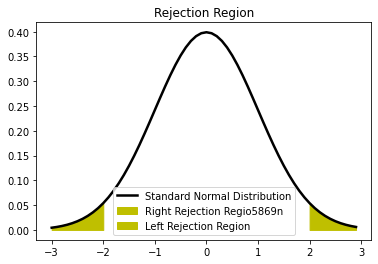

In [18]:
z = np.arange(-3 ,3, 0.1 )
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'black',linewidth = 2.5)
plt.fill_between(z[z > z_critical], norm.pdf(z[z > z_critical]), label = 'Right Rejection Regio5869n',color ='y' )
plt.fill_between(z[z < (-1) * z_critical], norm.pdf(z[z < (-1) * z_critical]), label = 'Left Rejection Region',color ='y' )
plt.title('Rejection Region')
plt.legend()
plt.show()

In [21]:
print(group_a)
print(mean_control_grp)
print(group_b)
print(mean_treatment_grp)

1       4.0
2       1.0
3       4.0
15      5.0
17      5.0
       ... 
2994    5.0
2995    5.0
2996    5.0
2997    5.0
2998    5.0
Name: OverAllRating, Length: 1015, dtype: float64
4.337931034482758
10      5.0
14      5.0
16      5.0
19      5.0
25      5.0
       ... 
2973    5.0
2974    5.0
2984    5.0
2986    5.0
2992    5.0
Name: OverAllRating, Length: 1306, dtype: float64
4.481623277182236


The Group-b is having a higher mean when compared to the Group-a So the Overall Rating is higher for the treatment group.